 |

## Generators of standard normal random variables, their comparison
Кодин Д

In [41]:
from scipy import integrate
from matplotlib import pyplot as plt
import math 
import numpy as np


def theory_prob(x):
    return math.exp(-x*x/2)


def calc_prob_theory(a,b):
    return 1/math.sqrt(2*math.pi) * integrate.quad(theory_prob, a, b)[0]


def calc_prob_practice(items, intervals, M):
    """ 
    Практическая вероятность чисел 
    items - (list) все сулчайныые величины
    intervals - (list) интервалов полученных в create_splitting(start, stop, N)
    M - количество примеров
    return: (list) - практическая вероятность 
    """
    prob_pr = []
    items = np.array(items)
    for a,b in intervals:
        M_pr = items[(items >= a) & (items<b)].shape[0]
        prob_pr.append(M_pr/M)

    return prob_pr
        

def create_splitting(start, stop, N):
    intervals = [(-math.inf, start)]
    
    h = abs(stop - start)/N
    for i in range(N):
        intervals.append((start +i*h, start +(i+1)*h))

    intervals.append((stop, math.inf))

    return intervals

def plots_proba(sample_generate, color, title, bins):
    fig, axes = plt.subplots(1, figsize=(5, 5), dpi=100)
    fig.suptitle(title)

    axes = plt.hist(sample_generate, color= color, edgecolor = 'black', bins = int(bins))


def criteria_Pirson(prob_pr, prob_th, M):
    prob_pr = np.array(prob_pr)
    prob_th = np.array(prob_th)
    
    return ((prob_pr - prob_th)**2/prob_th).sum() * M


#### Генераторы:

In [42]:
def generator_1():
    """ 
    Генератор первым способом.     
    """

    pre = np.random.uniform(low=0.0, high=1.0, size=12)
    res = pre.sum()
    
    return res - 6


def generator_2():
    x1, x2 = np.random.uniform(low=0.0, high=1.0, size=2)
    eps1 = math.cos(2*math.pi*x1)*math.sqrt(-2*math.log(x2))
    eps2 = math.sin(2*math.pi*x1)*math.sqrt(-2*math.log(x2))

    return eps1, eps2


def generator_3():
    x1, x2 = np.random.uniform(low=-1.0, high=1.0, size=2)
    s = x1*x1 + x2*x2

    while (s <= 0) or (s>=1):
        x1, x2 = np.random.uniform(low=-1.0, high=1.0, size=2)
        s = x1*x1 + x2*x2

    eps1 = x1 * math.sqrt(-2 * math.log(s) / s)
    eps2 = x2 * math.sqrt(-2 * math.log(s) / s)

    return eps1, eps2

def generator_4(phfi):
    x1, x2 = np.random.uniform(low=0.0, high=1.0, size=2)
    return math.sqrt(-2*math.log(x2))*math.cos(2*math.pi*x1 - phfi)


### Вычислим теоретическую вероятность

In [43]:
N = 1000

Проверка, сумма вероятностей: 0.9999999999999997


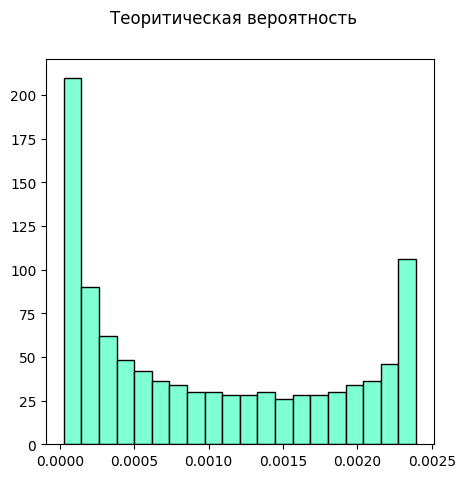

In [44]:
# Создаем разбиение
intervals = create_splitting(-3,3,N)

# Находим теоритическую вероятность
prob_th = []
for a, b in intervals:
    prob_th.append(calc_prob_theory(a, b))

print('Проверка, сумма вероятностей:', sum(prob_th))
plots_proba(prob_th, 'aquamarine', 'Теоритическая вероятность', 20)


# Первый генератор

### Генерируем величины

In [45]:
M = 10000

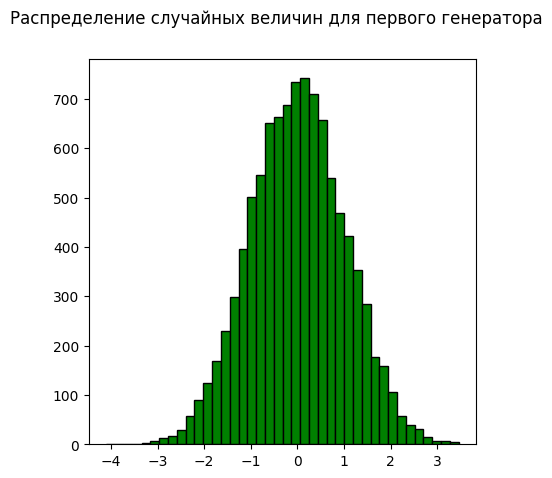

In [46]:
# сгенерируем 
sample_generate_1 = []
for i in range(M):
    sample_generate_1.append(generator_1())
    
plots_proba(sample_generate_1, 'green' ,'Распределение случайных величин для первого генератора',40)

### Считаем практическую вероятность

Проверка, сумма вероятностей: 0.9999999999999961


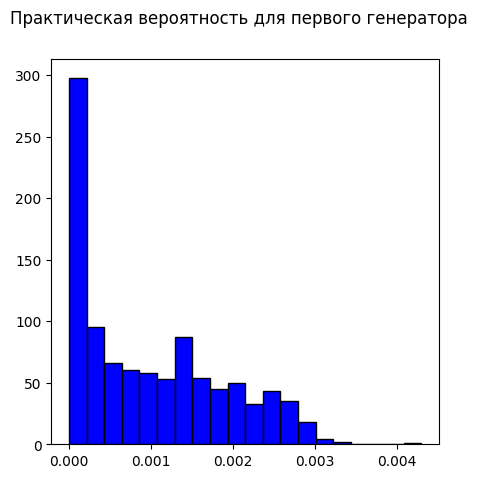

In [47]:
# считаем практическую вероятность
prob_pr = calc_prob_practice(sample_generate_1, intervals, M)

print('Проверка, сумма вероятностей:', sum(prob_pr))
plots_proba(prob_pr, 'blue', 'Практическая вероятность для первого генератора', 20)

### Считаем критерий Пирсона

In [48]:
criteria_Pirson_method_1 = criteria_Pirson(prob_pr, prob_th, M) 
criteria_Pirson_method_1 

1020.5024391256027

# Второй генератор

### Генерируем величины

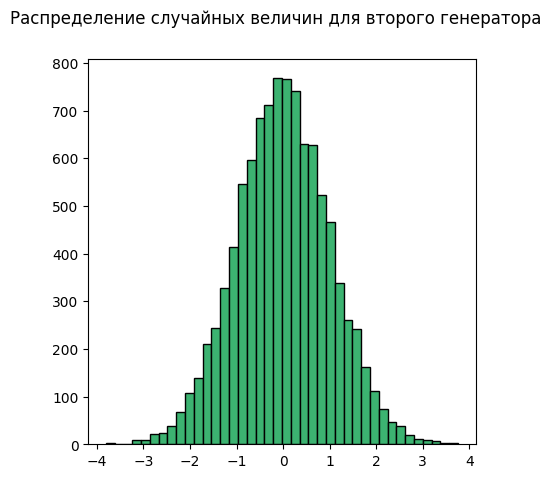

In [49]:
# генерируем

sample_generate_2 = []
for i in range(M//2):
    rand = generator_2()
    sample_generate_2.append(rand[0])
    sample_generate_2.append(rand[1])

plots_proba(sample_generate_2, 'mediumseagreen', 'Распределение случайных величин для второго генератора', 40)

### Считаем практическую вероятность

Проверка, сумма вероятностей: 0.9999999999999962


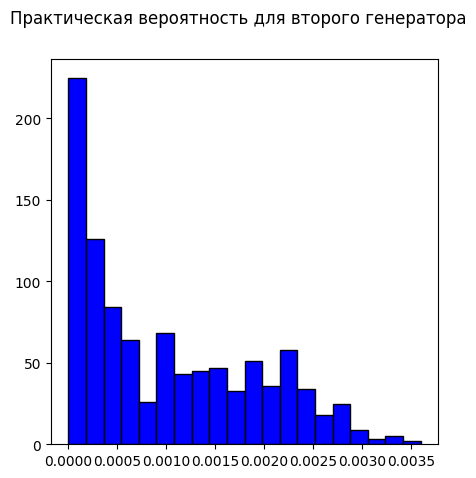

In [50]:
# считаем практическую вероятность
prob_pr = calc_prob_practice(sample_generate_2, intervals, M)

print('Проверка, сумма вероятностей:', sum(prob_pr))
plots_proba(prob_pr, 'blue', 'Практическая вероятность для второго генератора', 20)

### Считаем критерий Пирсона

In [51]:
criteria_Pirson_method_2 = criteria_Pirson(prob_pr, prob_th, M) 
criteria_Pirson_method_2 

1031.0612754629162

# Третий генератор - вопрос с корнем s или нет 

### Генерируем величины

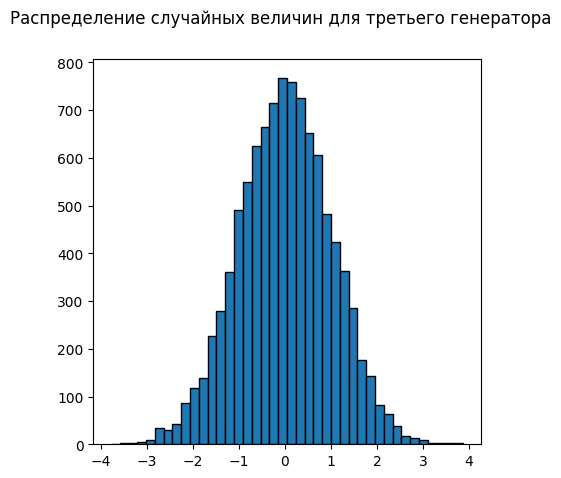

In [52]:
sample_generate_3 = []
for i in range(M//2):
    rand = generator_3()
    sample_generate_3.append(rand[0])
    sample_generate_3.append(rand[1])

plots_proba(sample_generate_3, 'tab:blue', 'Распределение случайных величин для третьего генератора', 40)

### Считаем практическую вероятность

Проверка, сумма вероятностей: 0.9999999999999967


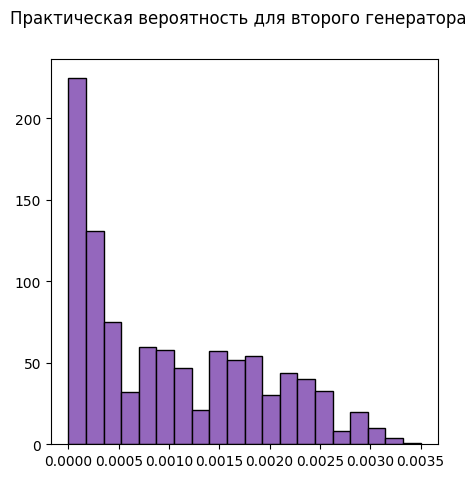

In [53]:
# считаем практическую вероятность
prob_pr = calc_prob_practice(sample_generate_3, intervals, M)

print('Проверка, сумма вероятностей:', sum(prob_pr))
plots_proba(prob_pr, 'tab:purple', 'Практическая вероятность для второго генератора', 20)


### Считаем критерий Пирсона

In [54]:
criteria_Pirson_method_3 = criteria_Pirson(prob_pr, prob_th, M) 
criteria_Pirson_method_3

1023.5793748209531

# Четвертый генератор 

### Генерируем величины

In [55]:
K = 100 
h = math.pi/K
print(h)

0.031415926535897934


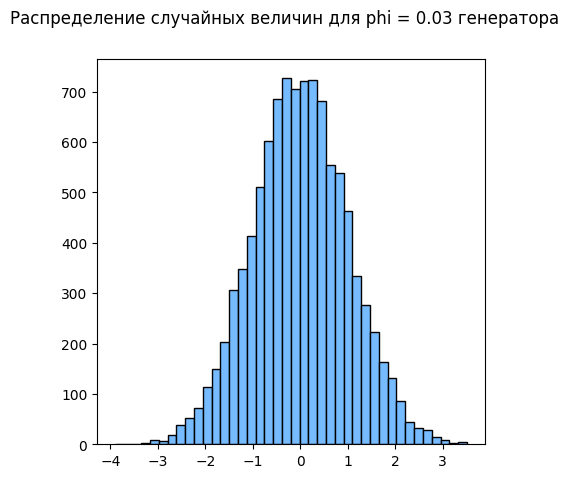

In [56]:
sample_generate_4 = []
phis_history = []
phfi = 0
for j in range(K+1): # перебираем все phi
    phfi = j*h
    phis_history.append(phfi)
    cur_sample = []
    for i in range(M): # генерируем 10 000 чисел
        cur_sample.append(generator_4(phfi))
    sample_generate_4.append(cur_sample)

plots_proba(sample_generate_4[1], 'xkcd:sky blue', 'Распределение случайных величин для phi = 0.03 генератора', 40)

### Считаем критерий Пирсона

In [57]:
criteries_Pirson_4 = []
for samples in sample_generate_4:
    # считаем практическую вероятность
    prob_pr = calc_prob_practice(samples, intervals, M)

    # считаем и запоминаем минимальный элемент
    cur_Pirson = criteria_Pirson(prob_pr, prob_th, M) 
    criteries_Pirson_4.append(cur_Pirson)
    

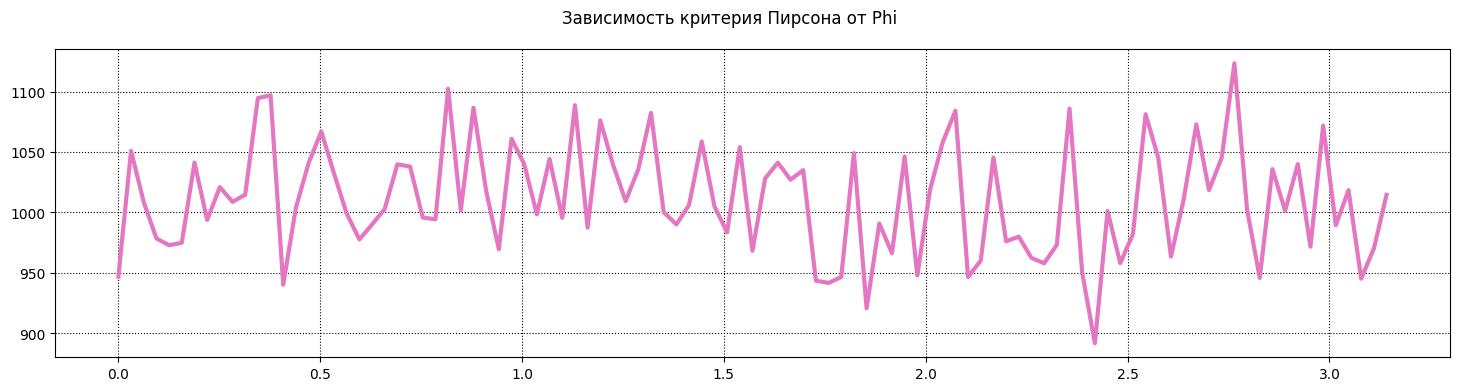

In [58]:
fig, axes = plt.subplots(1, figsize=(18, 4), dpi=100)
fig.suptitle('Зависимость критерия Пирсона от Phi')
f1 = axes.plot(phis_history, criteries_Pirson_4, color='tab:pink',linewidth = 3)
axes.grid(color = 'k', linestyle = ':')

### Берем лучший параметр phi

In [59]:
min_Pirson = min(criteries_Pirson_4)
best_index = criteries_Pirson_4.index(min_Pirson)
min_Phi = phis_history[best_index]

print('Минимальный критерий Пирсона: {}, Оптимальное Значение phi: {}'.format(min_Pirson,min_Phi))
print('Индекс:', best_index)


Минимальный критерий Пирсона: 891.8266216903328, Оптимальное Значение phi: 2.419026343264141
Индекс: 77


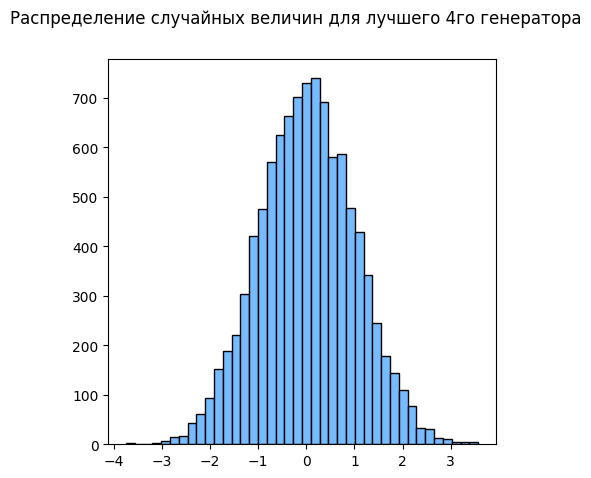

In [60]:
plots_proba(sample_generate_4[best_index], 'xkcd:sky blue', 'Распределение случайных величин для лучшего 4го генератора', 40)

# Сравнения и выводы

### Графики распрделения случайных величин

Text(0.5, 1.0, 'Метод 4')

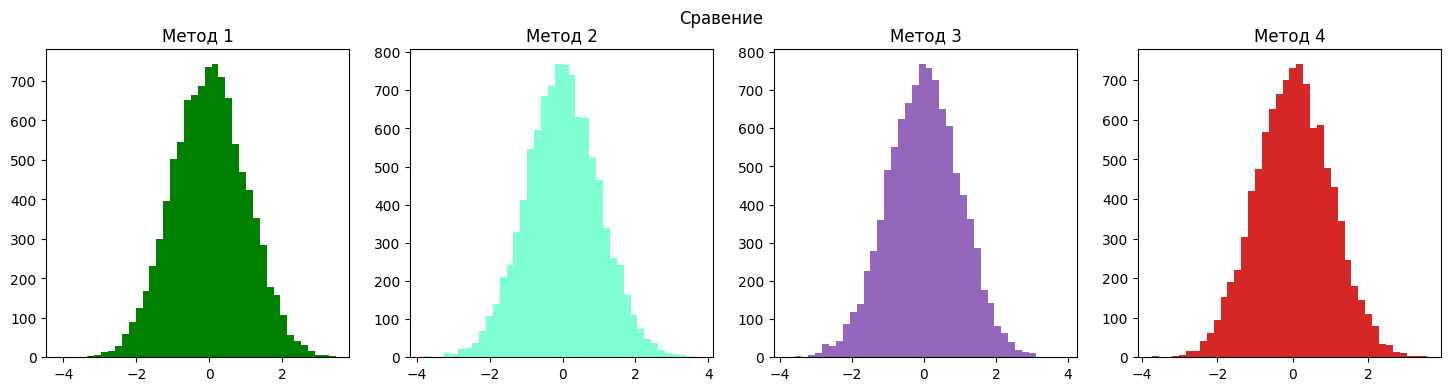

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4), dpi=100)
fig.suptitle('Сравение')

first = axes[0].hist(sample_generate_1, color= 'green', bins = int(40))
axes[0].set_title("Метод 1")

second = axes[1].hist(sample_generate_2, color= 'aquamarine', bins = int(40))
axes[1].set_title("Метод 2")

second = axes[2].hist(sample_generate_3, color= 'tab:purple', bins = int(40))
axes[2].set_title("Метод 3")

second = axes[3].hist(sample_generate_4[best_index], color= 'tab:red', bins = int(40))
axes[3].set_title("Метод 4")

### График зависимости критерия пирсона от phi для 4го задания

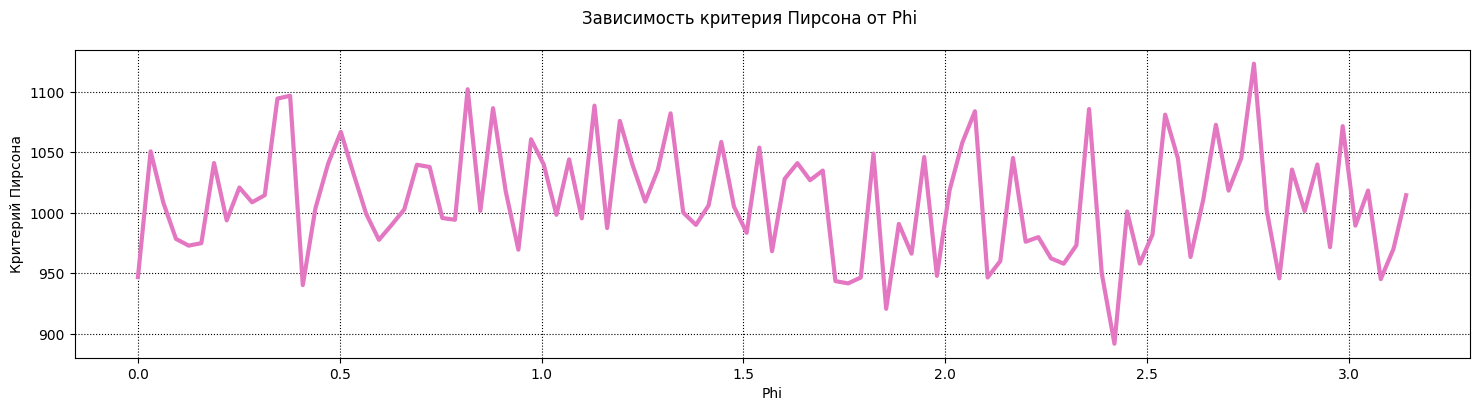

In [74]:
fig, axes = plt.subplots(1, figsize=(18, 4), dpi=100)
fig.suptitle('Зависимость критерия Пирсона от Phi')
f1 = axes.plot(phis_history, criteries_Pirson_4, color='tab:pink',linewidth = 3)
axes.set_xlabel("Phi")
axes.set_ylabel("Критерий Пирсона")
axes.grid(color = 'k', linestyle = ':')

### Таблица с значениями критерия Пирсона для каждого генератора

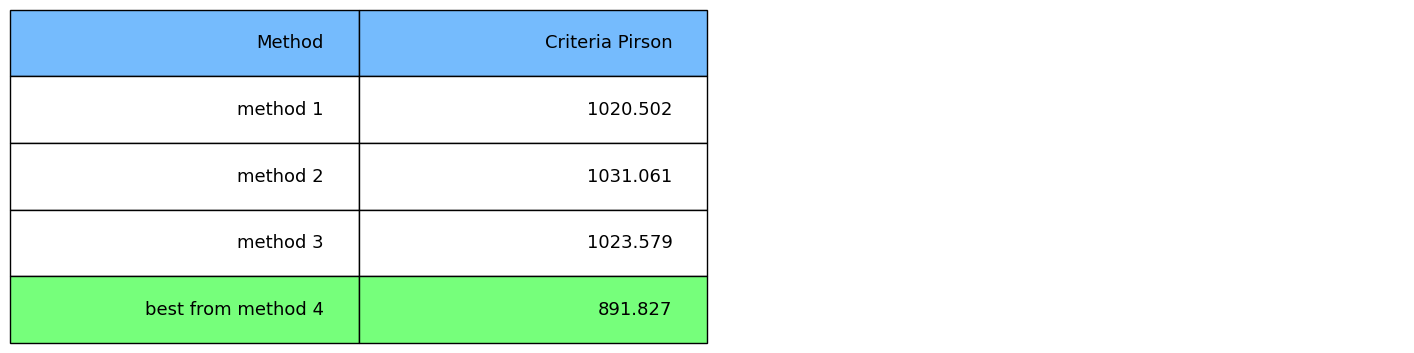

In [64]:
import matplotlib.pyplot as plt 

#define figure and axes
fig, ax = plt.subplots(figsize=(9, 1), dpi=100)

#create values for table
table_data=[
 ["Method", "Criteria Pirson"],
 ["method 1", "%5.3f" % criteria_Pirson_method_1],
 ["method 2", "%5.3f" % criteria_Pirson_method_2],
 ["method 3", "%5.3f" % criteria_Pirson_method_3],
 ["best from method 4", "%5.3f" % min_Pirson]
]

color =[
 ["xkcd:sky blue", "xkcd:sky blue"],
 ["w", 'w'],
  ["w", 'w'],
  ["w", 'w'],
  ["#76FF7B", '#76FF7B']
]

#create table
table = ax.table(cellText=table_data, loc='left', cellColours = color)

#modify table
table.set_fontsize (13)
table. scale (1,4)
ax.axis('off')

plt.show() 